<a href="https://colab.research.google.com/github/dangquangminh-minh/TH_TTNT_BaoCao/blob/main/K_Mean_v%C3%A0_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

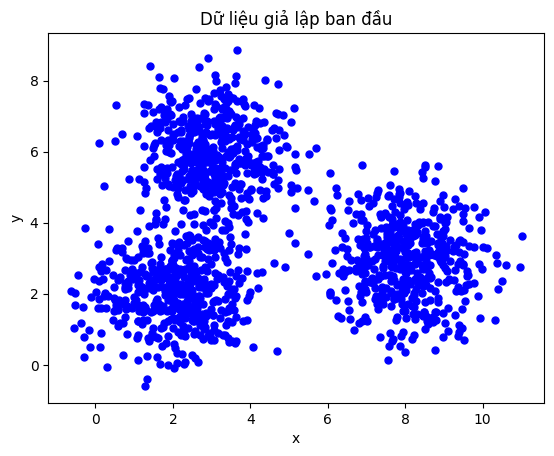

Tâm khởi tạo ban đầu:
 [[1.55756497 4.27781414]
 [7.36655933 3.84244454]
 [2.76397121 6.29872882]]


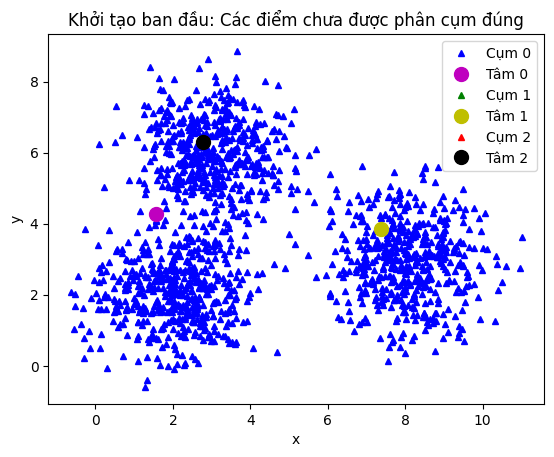

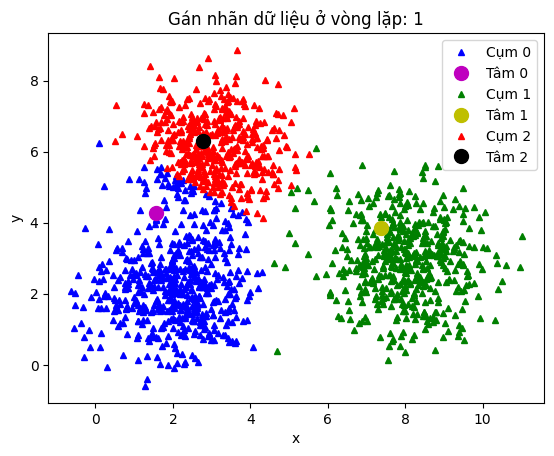

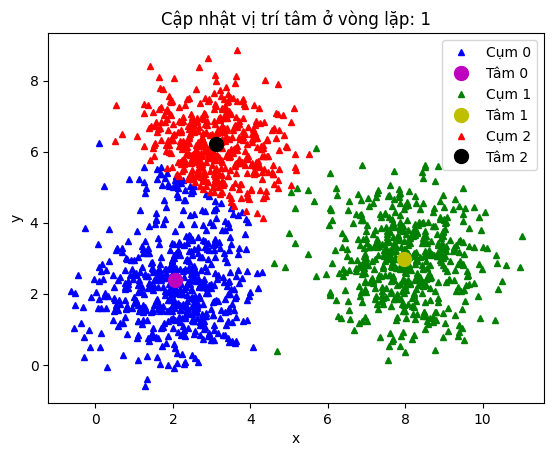

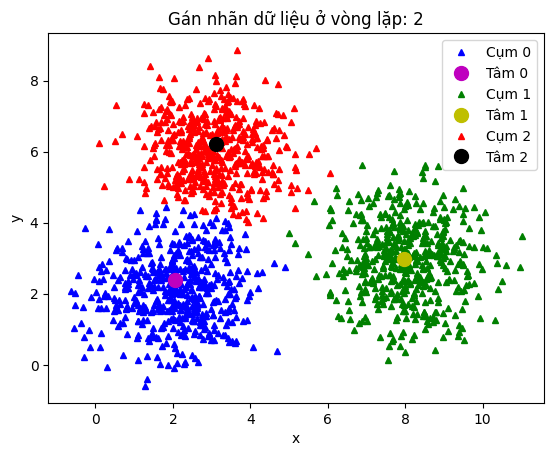

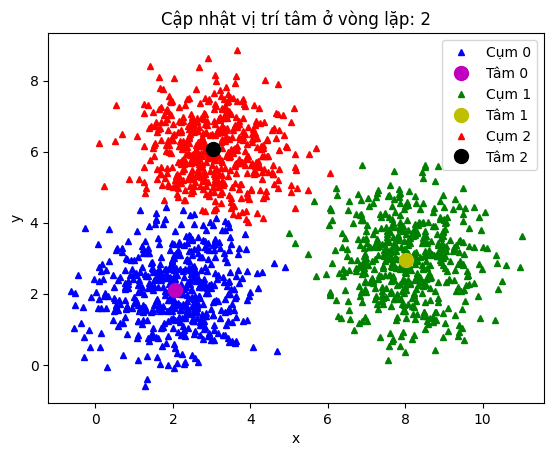

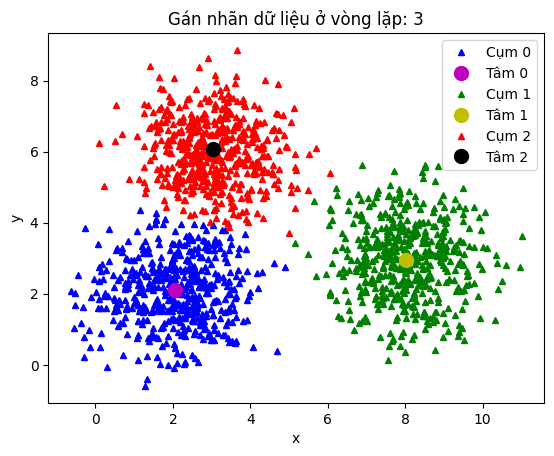

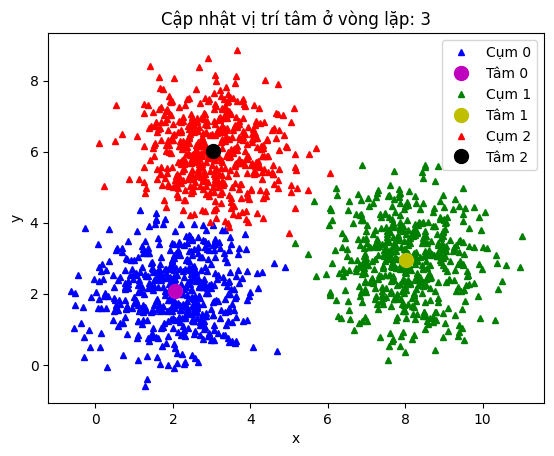

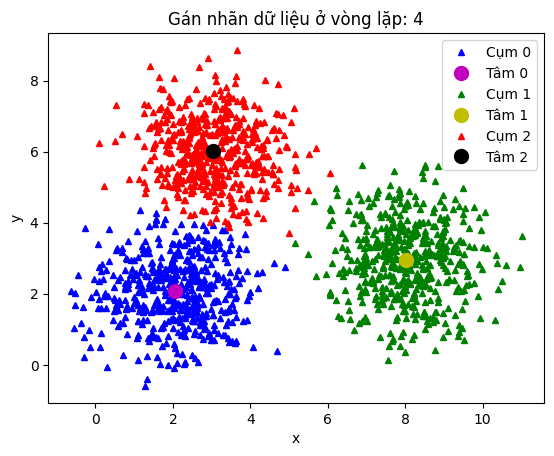

Hoàn tất! K-means đã hội tụ sau 3 vòng lặp.
Tọa độ các tâm cuối cùng:
 [[2.04427693 2.07711537]
 [8.02677996 2.95371972]
 [3.0381321  6.02365168]]


In [ ]:
import numpy as np # Thư viện toán học, xử lý ma trận
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị trực quan hóa
from scipy.spatial.distance import cdist # Hàm hỗ trợ tính khoảng cách giữa các điểm

# ============================================================
# PHẦN 1: TẠO DỮ LIỆU GIẢ LẬP
# ============================================================
# Khởi tạo 3 cụm dữ liệu xung quanh 3 tâm (means) là: (2, 2), (8, 3) và (3, 6).
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]] # Ma trận hiệp phương sai (độ phân tán của dữ liệu)
n_samples = 500 # Số lượng điểm dữ liệu mỗi cụm
n_cluster = 3   # Số lượng cụm (K = 3)

# Tạo dữ liệu ngẫu nhiên tuân theo phân phối chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)

# Gộp tất cả các điểm lại thành một tập dữ liệu lớn X
X = np.concatenate((X0, X1, X2), axis = 0)

# Hiển thị dữ liệu vừa tạo lên đồ thị để kiểm tra
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dữ liệu giả lập ban đầu')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5) # 'bo': màu xanh (blue), hình tròn (o)
plt.show()

# ============================================================
# PHẦN 2: CÁC HÀM CỦA THUẬT TOÁN K-MEANS
# ============================================================

def kmeans_init_centers(X, n_cluster):
    """
    Bước 1: Khởi tạo các tâm cụm ban đầu.
    Cách làm: Chọn ngẫu nhiên k điểm từ dữ liệu X làm tâm.
    """
    # Chọn ngẫu nhiên n_cluster chỉ số (index) từ 0 đến số lượng điểm dữ liệu
    # replace=False nghĩa là không chọn trùng lặp
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)] #đặt x.shape ngẫu nhiên vào các tâm , replace = false : không đc lặp lại khi lấy x.shape

def kmeans_predict_labels(X, centers):
    """
    Bước 2 (E-step): Gán nhãn cho các điểm dữ liệu.
    Cách làm: Tính khoảng cách từ mỗi điểm đến các tâm, gán nó vào tâm gần nhất.
    """
    # Tính khoảng cách giữa các điểm trong X và các tâm (centers)
    D = cdist(X, centers)
    # Trả về chỉ số của tâm cụm có khoảng cách nhỏ nhất (argmin)
    return np.argmin(D, axis = 1)# min: trả về giá trị nhỏ nhất , argmin:trả về vị trí gtri nhỏ nhất,axis = 1 , duyệt qua từng dòng , tìm xem cột nào có gtri nhỏ nhất

def kmeans_update_centers(X, labels, n_cluster):
    """
    Bước 3 (M-step): Cập nhật vị trí tâm cụm mới.
    Cách làm: Lấy trung bình cộng toạ độ của tất cả các điểm thuộc về cụm đó.
    """
    # tạo khung chứa tọa độ mới
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # Lấy tất cả các điểm được gán nhãn là k
        Xk = X[labels == k, :]
        # Tính trung bình cộng (mean) theo cột (axis=0) để ra toạ độ mới
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def kmeans_has_converged(centers, new_centers):
    """
    Kiểm tra hội tụ: So sánh xem tâm cụm cũ và mới có giống hệt nhau không.
    Nếu giống nhau -> Thuật toán dừng lại.
    """
    # Chuyển về set (tập hợp) các tuple để so sánh cho dễ
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))# center: là 1 ma trận mảng 2 chiều , a là tọa độ 1 tâm

def kmeans_visualize(X, centers, labels, n_cluster, title):
    """
    Hàm vẽ đồ thị để quan sát quá trình chạy.
    Lưu ý: Do danh sách màu có hạn, hàm này hiển thị tốt nhất khi n_cluster <= 4.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    # Danh sách màu để vẽ: 4 màu đầu cho điểm, 4 màu sau cho tâm
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i] # Lấy dữ liệu của cụm thứ i
        # Vẽ các điểm thuộc cụm i (dùng màu i)
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='Cụm ' + str(i))
        # Vẽ tâm của cụm i (dùng màu i+4 để nổi bật, hình tròn to)
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o', markersize=10, label='Tâm ' + str(i))

    plt.legend() # Hiện bảng chú thích
    plt.show()

# ============================================================
# PHẦN 3: VÒNG LẶP CHÍNH (MAIN LOOP)
# ============================================================

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0 # Đếm số lần lặp

    while True:
        # 1. Gán nhãn cho các điểm dữ liệu dựa trên tâm hiện tại
        labels = kmeans_predict_labels(X, centers)# gọi hàm predict để xem vị trí của các tâm hiện tại xem nó về tâm nào rồi gán nhãn cho nó ở tâm đó

        # Vẽ đồ thị sau khi gán nhãn
        kmeans_visualize(X, centers, labels, n_cluster, 'Gán nhãn dữ liệu ở vòng lặp: ' + str(times + 1))

        # 2. Tính toán vị trí tâm mới dựa trên nhãn vừa gán
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # 3. Kiểm tra xem thuật toán đã hội tụ chưa
        if kmeans_has_converged(centers, new_centers):
            break # Nếu tâm không đổi, thoát vòng lặp

        centers = new_centers

        # Vẽ đồ thị sau khi cập nhật tâm
        kmeans_visualize(X, centers, labels, n_cluster, 'Cập nhật vị trí tâm ở vòng lặp: ' + str(times + 1))
        times += 1

    return (centers, labels, times)

# ============================================================
# PHẦN 4: THỰC THI (CHẠY CHƯƠNG TRÌNH)
# ============================================================

# Bước khởi tạo đầu tiên
init_centers = kmeans_init_centers(X, n_cluster)
print("Tâm khởi tạo ban đầu:\n", init_centers)

# Ban đầu chưa có nhãn nào, gán tạm là 0 hết
init_labels = np.zeros(X.shape[0])

# Vẽ trạng thái khởi tạo
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Khởi tạo ban đầu: Các điểm chưa được phân cụm đúng')

# Chạy thuật toán K-means
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Hoàn tất! K-means đã hội tụ sau', times, 'vòng lặp.')
print('Tọa độ các tâm cuối cùng:\n', centers)

--- Đang tạo dữ liệu giả lập ---
--- Vẽ biểu đồ phân bố gốc ---


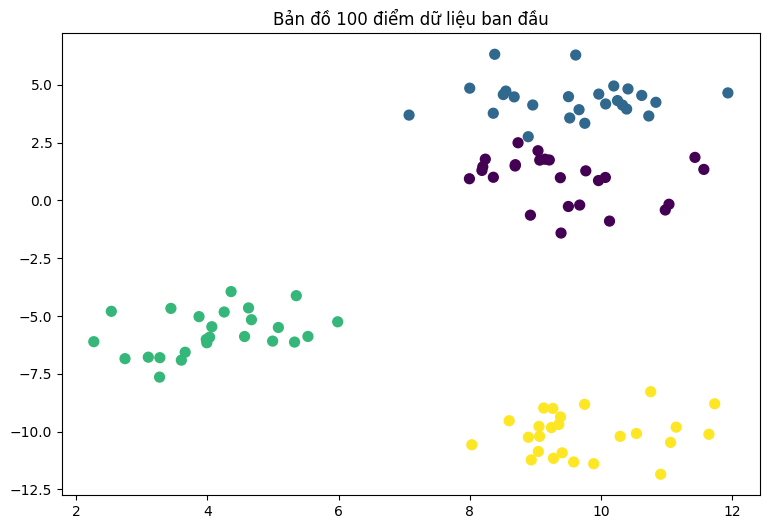

--- Vẽ biểu đồ đề thi (Dữ liệu máy cần đoán) ---


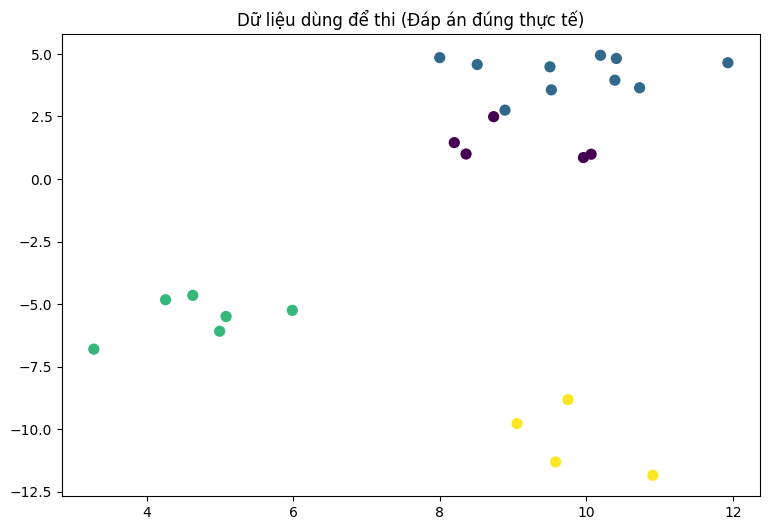

--- Máy bắt đầu đoán với k=5 ---


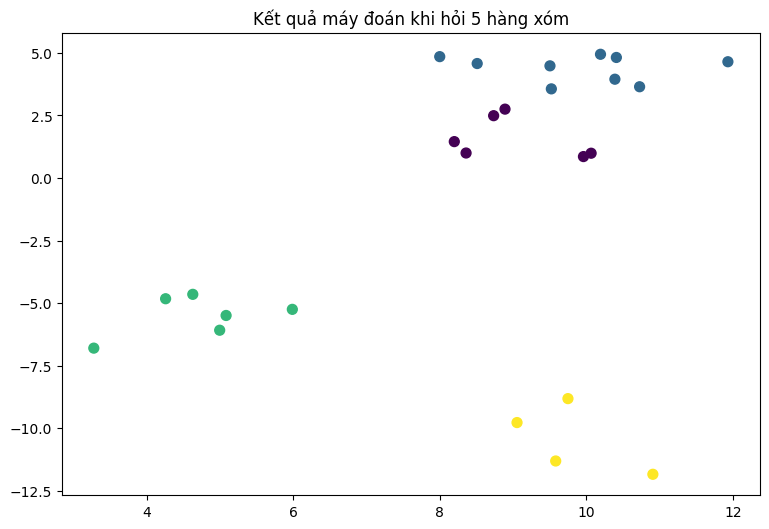

--- Máy bắt đầu đoán với k=1 ---


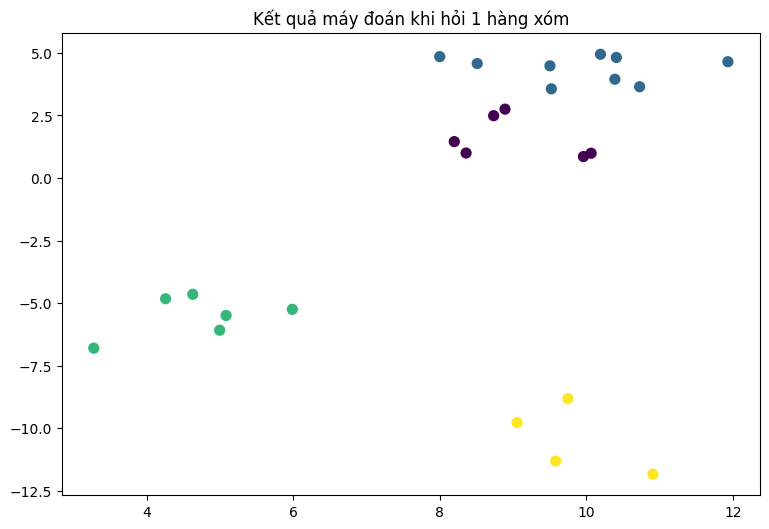

--- Máy tự đi tìm xem hỏi bao nhiêu hàng xóm là tốt nhất ---
--> Máy bảo là: Hỏi 2 hàng xóm là chuẩn nhất!
--------------------------------------------------

--- Chạy hàm KNN Tự Viết (Để hiểu bản chất) ---
Kết quả dự đoán cho điểm (1, 3): Thuộc nhóm 0


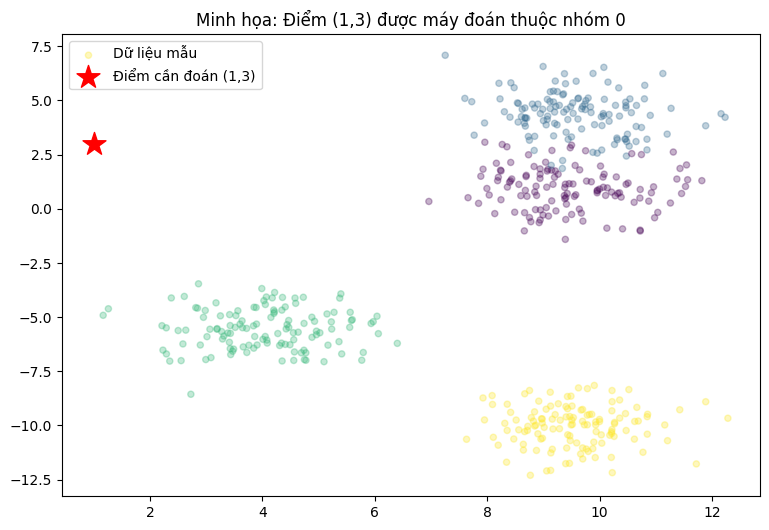

In [ ]:
# =============================================================================
# BƯỚC 1: NHẬP THƯ VIỆN (GIỮ NGUYÊN TÊN THƯ VIỆN)
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt # Công cụ vẽ hình
from sklearn.datasets import make_blobs # Công cụ tạo dữ liệu giả
from sklearn.neighbors import KNeighborsClassifier # Thuật toán KNN có sẵn
from sklearn.model_selection import train_test_split # Công cụ chia bài (Học/Thi)
from sklearn.model_selection import GridSearchCV # Công cụ tự tìm cách giải tốt nhất

# =============================================================================
# BƯỚC 2: TẠO DỮ LIỆU GIẢ LẬP
# =============================================================================
print("--- Đang tạo dữ liệu giả lập ---")

# Tạo 100 điểm dữ liệu (100 bệnh nhân), chia làm 4 nhóm bệnh (centers=4)
# Du_lieu_Toa_do (X): Chứa tọa độ x, y (ví dụ: huyết áp, nhịp tim)
# Nhan_Loai_Benh (y): Chứa đáp án (ví dụ: 0=Khỏe, 1=Bệnh A, 2=Bệnh B...)
Du_lieu_Toa_do, Nhan_Loai_Benh = make_blobs(n_samples=100, n_features=2, centers=4,
                                            cluster_std=1, random_state=4)# cluster: độ lệch chuẩn của cụm,random_state: cố định kết quả ngẫu nhiên
#nhan_loai_benh : đáp án để biết bệnh nhân đó thuộc bệnh nào
# =============================================================================
# BƯỚC 3: VẼ HÌNH DỮ LIỆU GỐC
# =============================================================================
print("--- Vẽ biểu đồ phân bố gốc ---")
plt.figure(figsize=(9, 6))
# Vẽ các chấm tròn lên bản đồ
plt.scatter(Du_lieu_Toa_do[:, 0], Du_lieu_Toa_do[:, 1], c=Nhan_Loai_Benh, marker='o', s=50, cmap='viridis')
plt.title("Bản đồ 100 điểm dữ liệu ban đầu")
plt.show()

# =============================================================================
# BƯỚC 4: CHIA DỮ LIỆU ĐỂ HỌC VÀ THI
# =============================================================================
# Chia làm 2 phần:
# - 75% để máy học (Sách giáo khoa)
# - 25% để máy thi (Đề thi)
Du_lieu_Hoc, Du_lieu_Thi, Dap_an_Hoc, Dap_an_Thi = train_test_split(Du_lieu_Toa_do, Nhan_Loai_Benh,
                                                                    test_size=0.25, random_state=0)

print("--- Vẽ biểu đồ đề thi (Dữ liệu máy cần đoán) ---")
plt.figure(figsize=(9, 6))
plt.scatter(Du_lieu_Thi[:, 0], Du_lieu_Thi[:, 1], c=Dap_an_Thi, marker='o', s=50, cmap='viridis')
plt.title("Dữ liệu dùng để thi (Đáp án đúng thực tế)")
plt.show()

# =============================================================================
# BƯỚC 5: MÁY HỌC VÀ ĐOÁN VỚI k=5 (5 HÀNG XÓM)
# =============================================================================
print("--- Máy bắt đầu đoán với k=5 ---")
# Khởi tạo não bộ cho máy, bảo nó hãy nhìn 5 người gần nhất
Mo_hinh_5_Hang_xom = KNeighborsClassifier(n_neighbors=5)

# Cho máy học thuộc lòng dữ liệu
Mo_hinh_5_Hang_xom.fit(Du_lieu_Hoc, Dap_an_Hoc)

# Máy làm bài thi (Dự đoán)
Ket_qua_May_Doan_5 = Mo_hinh_5_Hang_xom.predict(Du_lieu_Thi)

plt.figure(figsize=(9, 6))
plt.scatter(Du_lieu_Thi[:, 0], Du_lieu_Thi[:, 1], c=Ket_qua_May_Doan_5, marker='o', s=50, cmap='viridis')
plt.title("Kết quả máy đoán khi hỏi 5 hàng xóm")
plt.show()

# =============================================================================
# BƯỚC 6: MÁY HỌC VÀ ĐOÁN VỚI k=1 (1 HÀNG XÓM)
# =============================================================================
print("--- Máy bắt đầu đoán với k=1 ---")
Mo_hinh_1_Hang_xom = KNeighborsClassifier(n_neighbors=1) # Chỉ tin 1 người gần nhất
Mo_hinh_1_Hang_xom.fit(Du_lieu_Hoc, Dap_an_Hoc)
Ket_qua_May_Doan_1 = Mo_hinh_1_Hang_xom.predict(Du_lieu_Thi)

plt.figure(figsize=(9, 6))
plt.scatter(Du_lieu_Thi[:, 0], Du_lieu_Thi[:, 1], c=Ket_qua_May_Doan_1, marker='o', s=50, cmap='viridis')
plt.title("Kết quả máy đoán khi hỏi 1 hàng xóm")
plt.show()

# =============================================================================
# BƯỚC 7: TỰ ĐỘNG TÌM SỐ HÀNG XÓM (k) TỐT NHẤT
# =============================================================================
print("--- Máy tự đi tìm xem hỏi bao nhiêu hàng xóm là tốt nhất ---")
# Tạo danh sách số k muốn thử: từ 1 đến 9
danh_sach_k_muon_thu = {'n_neighbors': np.arange(1, 10)}

# Khởi tạo công cụ tìm kiếm
Cong_cu_Tim_kiem = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=danh_sach_k_muon_thu,
                                cv=5)

Cong_cu_Tim_kiem.fit(Du_lieu_Toa_do, Nhan_Loai_Benh)

print(f"--> Máy bảo là: Hỏi {Cong_cu_Tim_kiem.best_params_['n_neighbors']} hàng xóm là chuẩn nhất!")
print("-" * 50)

# =============================================================================
# PHẦN CUỐI: TỰ VIẾT LẠI THUẬT TOÁN (KHÔNG DÙNG THƯ VIỆN)
# =============================================================================
print("\n--- Chạy hàm KNN Tự Viết (Để hiểu bản chất) ---")

def Ham_KNN_Tu_Lam(Tap_Du_lieu_Mau, Tap_Can_Doan, Nhan_cua_Mau, so_hang_xom_k):
    """
    Hàm này mô phỏng lại cách máy tính suy nghĩ
    """
    so_luong_can_doan = Tap_Can_Doan.shape[0]   # Có bao nhiêu điểm cần đoán?
    so_luong_mau = Tap_Du_lieu_Mau.shape[0]     # Trong kho có bao nhiêu mẫu?

    # Tạo bảng trống để ghi chép khoảng cách
    bang_khoang_cach = np.zeros((so_luong_can_doan, so_luong_mau))

    # 1. CẦM THƯỚC ĐI ĐO KHOẢNG CÁCH
    for i in range(so_luong_can_doan):
        for j in range(so_luong_mau):
            # Công thức Pytago: Căn bậc 2 của (Hiệu bình phương tọa độ)
            khoang_cach = np.sqrt(np.sum(np.power(Tap_Can_Doan[i, :] - Tap_Du_lieu_Mau[j, :], 2)))
            bang_khoang_cach[i, j] = khoang_cach

    danh_sach_ket_qua = []

    # 2. XẾP HẠNG VÀ BẦU CỬ
    for i in range(len(bang_khoang_cach)):
        # Ghép khoảng cách vừa đo với đáp án tương ứng
        danh_sach_khoang_cach = zip(bang_khoang_cach[i, :], Nhan_cua_Mau)

        # Sắp xếp: Ai gần nhất (khoảng cách nhỏ nhất) thì đứng đầu
        danh_sach_sap_xep = sorted(danh_sach_khoang_cach, key=lambda x: x[0])# stored : đưa những người có khoảng cách nhỏ nhất lên đầu

        # Lấy ra top k người đứng đầu
        top_k_nguoi_gan_nhat = danh_sach_sap_xep[:so_hang_xom_k]

        # Kiểm phiếu: Phe nào đông nhất?
        thung_phieu = {}
        for _, nhan_phe in top_k_nguoi_gan_nhat:
            nhan_phe = int(nhan_phe)
            if nhan_phe not in thung_phieu:
                thung_phieu[nhan_phe] = 1
            else:
                thung_phieu[nhan_phe] = thung_phieu[nhan_phe] + 1

        # Tuyên bố phe chiến thắng
        phe_thang_cu = max(thung_phieu, key=thung_phieu.get)
        danh_sach_ket_qua.append(phe_thang_cu)

    return np.array(danh_sach_ket_qua)

# --- THỬ NGHIỆM TRÊN DỮ LIỆU MỚI ---

# Tạo lại dữ liệu mới 500 điểm
(Du_lieu_Moi, Nhan_Moi) = make_blobs(n_samples=500, n_features=2, centers=4,
                                     cluster_std=1, random_state=4)

# Tạo 1 điểm bất kỳ để thử: Tọa độ x=1, y=3
Diem_Can_Doan = np.array([(1, 3)])

# Gọi hàm tự viết
Ket_qua_Cuoi_Cung = Ham_KNN_Tu_Lam(Du_lieu_Moi, Diem_Can_Doan, Nhan_Moi, so_hang_xom_k=3)

print(f"Kết quả dự đoán cho điểm (1, 3): Thuộc nhóm {Ket_qua_Cuoi_Cung[0]}")

# Vẽ hình minh họa
plt.figure(figsize=(9, 6))
plt.scatter(Du_lieu_Moi[:, 0], Du_lieu_Moi[:, 1], c=Nhan_Moi, s=20, alpha=0.3, cmap='viridis', label='Dữ liệu mẫu')
plt.scatter(Diem_Can_Doan[:, 0], Diem_Can_Doan[:, 1], c='red', s=300, marker='*', label='Điểm cần đoán (1,3)')
plt.legend()
plt.title(f"Minh họa: Điểm (1,3) được máy đoán thuộc nhóm {Ket_qua_Cuoi_Cung[0]}")
plt.show()

--- KẾT QUẢ VỚI k=3 ---
Hàng xóm thứ 1 là: Lê (Khoảng cách: 2.06)
Hàng xóm thứ 2 là: Táo (Khoảng cách: 2.06)
Hàng xóm thứ 3 là: Táo (Khoảng cách: 2.06)

==> KẾT LUẬN: Vì có 2 Táo và 1 Lê ở gần nhất, nên máy đoán đây là quả TÁO!


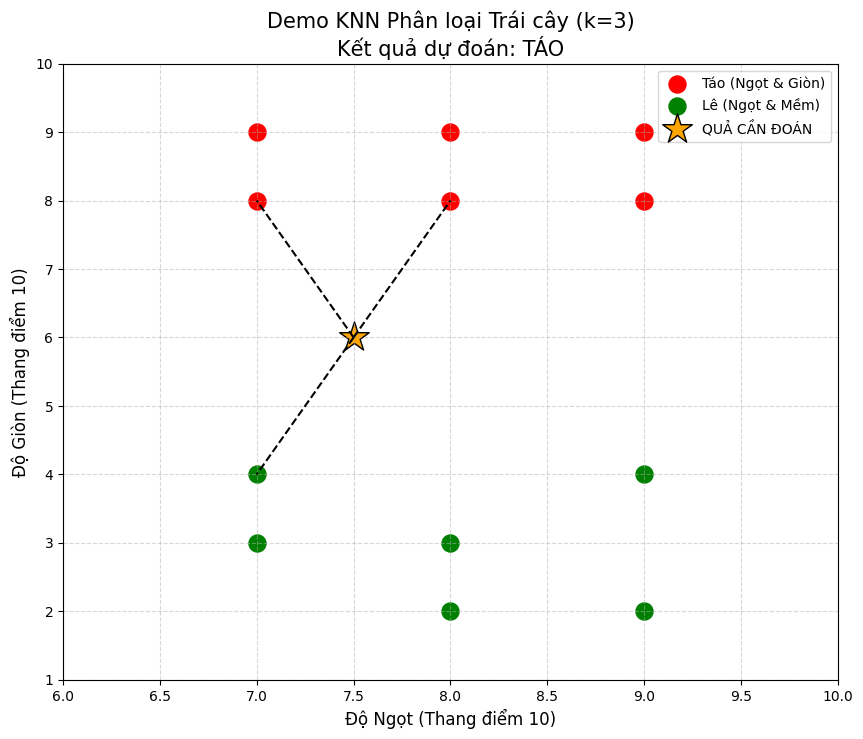

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# ==========================================
# 1. TẠO DỮ LIỆU GIẢ LẬP (TÁO VÀ LÊ)
# ==========================================

# Đặc trưng: [Độ Ngọt (1-10), Độ Giòn (1-10)]
# Nhóm Táo (Đỏ): Ngọt cao (7-9), Giòn cao (7-9)
tao = np.array([
    [8, 9], [7, 8], [8, 8], [9, 9], [7, 9], [9, 8]
])

# Nhóm Lê (Xanh): Ngọt cao (7-9), Giòn thấp (2-4)
le = np.array([
    [8, 3], [7, 4], [9, 2], [7, 3], [8, 2], [9, 4]
])

# Gộp lại thành tập dữ liệu huấn luyện
X_train = np.vstack((tao, le))
y_train = np.array(['Táo'] * len(tao) + ['Lê'] * len(le))

# ==========================================
# 2. TẠO 1 QUẢ BẤT KỲ CẦN DỰ ĐOÁN
# ==========================================
# Quả này có: Độ ngọt = 7.5, Độ giòn = 6
# (Nó nằm lơ lửng ở giữa, hơi khó đoán bằng mắt thường)
qua_bi_an = np.array([[7.5, 6]])

# ==========================================
# 3. CHẠY THUẬT TOÁN KNN (TÌM HÀNG XÓM)
# ==========================================
k = 3 # Chọn 3 hàng xóm gần nhất
model = NearestNeighbors(n_neighbors=k)
model.fit(X_train)

# Tìm khoảng cách và vị trí của k hàng xóm gần nhất
khoang_cach, vi_tri = model.kneighbors(qua_bi_an)

# ==========================================
# 4. VẼ BIỂU ĐỒ TRỰC QUAN HÓA (QUAN TRỌNG NHẤT)
# ==========================================
plt.figure(figsize=(10, 8))

# Vẽ nhóm Táo
plt.scatter(tao[:, 0], tao[:, 1], c='red', s=150, label='Táo (Ngọt & Giòn)')
# Vẽ nhóm Lê
plt.scatter(le[:, 0], le[:, 1], c='green', s=150, label='Lê (Ngọt & Mềm)')
# Vẽ Quả bí ẩn
plt.scatter(qua_bi_an[:, 0], qua_bi_an[:, 1], c='orange', marker='*', s=500, edgecolors='black', label='QUẢ CẦN ĐOÁN')

# VẼ ĐƯỜNG NỐI ĐẾN CÁC HÀNG XÓM (Để giải thích cho thầy)
# Lấy ra danh sách hàng xóm gần nhất
hang_xom_gan_nhat = X_train[vi_tri[0]]

print(f"--- KẾT QUẢ VỚI k={k} ---")
dem_tao = 0
dem_le = 0

for i, hang_xom in enumerate(hang_xom_gan_nhat):
    # Vẽ đường nối
    plt.plot([qua_bi_an[0, 0], hang_xom[0]], [qua_bi_an[0, 1], hang_xom[1]],
             'k--', linewidth=1.5) # Đường nét đứt màu đen

    # Xác định xem hàng xóm đó là Táo hay Lê để in ra
    loai_hang_xom = y_train[vi_tri[0][i]]
    print(f"Hàng xóm thứ {i+1} là: {loai_hang_xom} (Khoảng cách: {khoang_cach[0][i]:.2f})")

    if loai_hang_xom == 'Táo': dem_tao += 1
    else: dem_le += 1

# Kết luận cuối cùng
ket_luan = "TÁO" if dem_tao > dem_le else "LÊ"
print(f"\n==> KẾT LUẬN: Vì có {dem_tao} Táo và {dem_le} Lê ở gần nhất, nên máy đoán đây là quả {ket_luan}!")

# Trang trí biểu đồ
plt.title(f'Demo KNN Phân loại Trái cây (k={k})\nKết quả dự đoán: {ket_luan}', fontsize=15)
plt.xlabel('Độ Ngọt (Thang điểm 10)', fontsize=12)
plt.ylabel('Độ Giòn (Thang điểm 10)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(6, 10)
plt.ylim(1, 10)

plt.show()